In [ ]:
### Linear Regression Model for medical cost dataset
#age, sex, BMI, children, smoker, and region will be independent variables
# charge will be our target variable
### Will predict individual medical costs billed by health insurance

In [ ]:
### Linear Regression is a supervised learning algorithm when the target / dependent variable is a continuous real number.
### Goal is to minimize the sum of square difference between the observed dependent variable in a given data set and those predicted by linear regression function.


In [1]:
# Import library
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

<ipython-input-1-edfe5ae80b05>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
# Import dataset
#path ='dataset/'
df = pd.read_csv('/mnt/Interview/insurance.csv')
print('\nNumber of rows and columns in the data set: ',df.shape)
print('')

#Lets look into top few rows and columns in the dataset
df.head()


Number of rows and columns in the data set:  (1338, 7)



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


/opt/conda/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


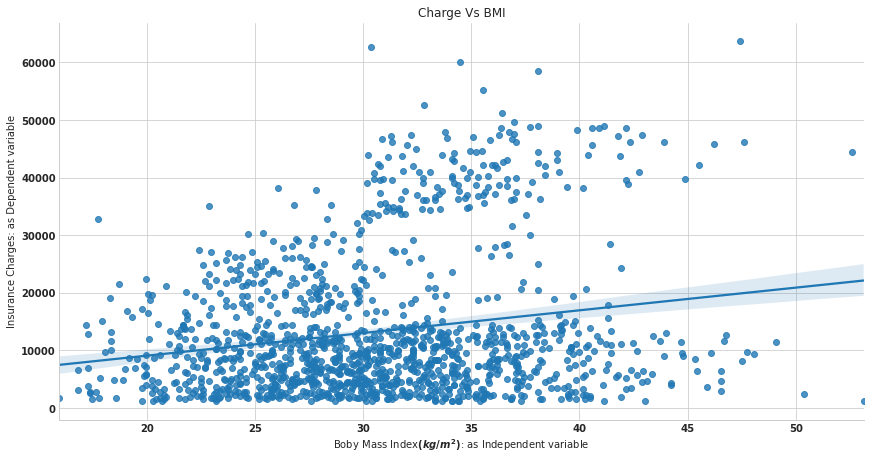

In [3]:
""" for our visualization purpose will fit line using seaborn library only for bmi as independent variable 
and charges as dependent variable"""

sns.lmplot(x='bmi',y='charges',data=df,aspect=2,height=6)
plt.xlabel('Boby Mass Index$(kg/m^2)$: as Independent variable')
plt.ylabel('Insurance Charges: as Dependent variable')
plt.title('Charge Vs BMI');

In [ ]:
### Cost Function: Measures how much error is in he model in erms of the abiliy to estimate the relationship between x and y.
## Takes average difference of observed dependent variable in the dataset and those predicted by the hypothesis function

In [ ]:
#things to do when working with linear regression
### Check for missing values: may need to impute
### Check for multicollinearity: Perform correlation plot and VIF (remove certain KPIs if greater than 5 (threshold))

In [ ]:
#If we look at the left plot the charges varies from 1120 to 63500, the plot is right skewed. 
#In right plot we will apply natural log, then plot approximately tends to normal. 
#for further analysis we will apply log on target variable charges.

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


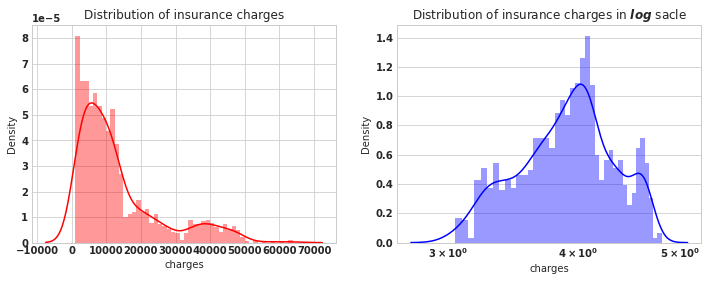

In [4]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log');

In [6]:
"""From left plot the insurance charge for male and female is approximatley in same range,it is average around 5000 bucks. In right plot the insurance charge for smokers is much wide range compare to non smokers, the average charges for non smoker is approximately 5000 bucks. For smoker the minimum insurance charge is itself 5000 bucks.
"""

'From left plot the insurance charge for male and female is approximatley in same range,it is average around 5000 bucks. In right plot the insurance charge for smokers is much wide range compare to non smokers, the average charges for non smoker is approximately 5000 bucks. For smoker the minimum insurance charge is itself 5000 bucks.\n'

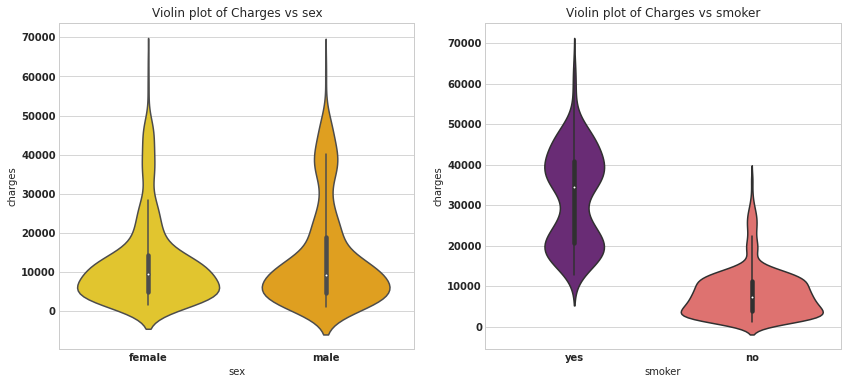

In [5]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='sex', y='charges',data=df,palette='Wistia',ax=ax)
ax.set_title('Violin plot of Charges vs sex')

ax = f.add_subplot(122)
sns.violinplot(x='smoker', y='charges',data=df,palette='magma',ax=ax)
ax.set_title('Violin plot of Charges vs smoker');

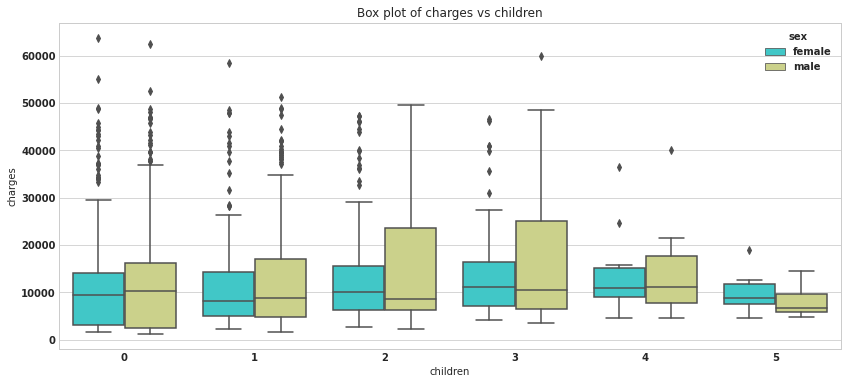

In [7]:
plt.figure(figsize=(14,6))
sns.boxplot(x='children', y='charges',hue='sex',data=df,palette='rainbow')
plt.title('Box plot of charges vs children');

In [8]:
df.groupby('children').agg(['mean','min','max'])['charges']


,mean,min,max
children,,,
0,12365.975602,1121.8739,63770.42801
1,12731.171832,1711.0268,58571.07448
2,15073.563734,2304.0022,49577.66240
3,15355.318367,3443.0640,60021.39897
4,13850.656311,4504.6624,40182.24600
5,8786.035247,4687.7970,19023.26000


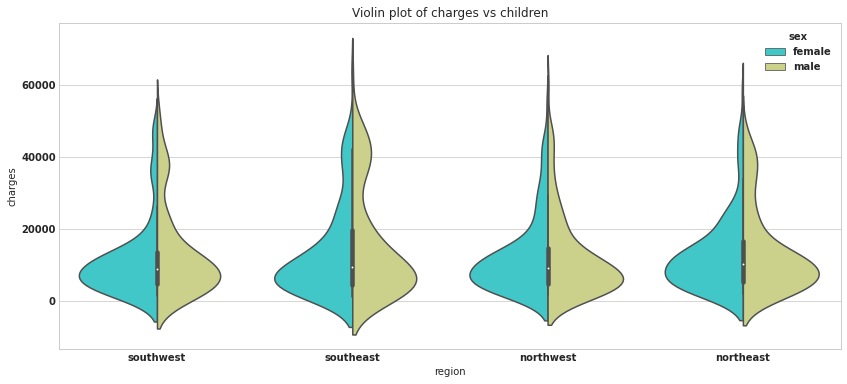

In [9]:
plt.figure(figsize=(14,6))
sns.violinplot(x='region', y='charges',hue='sex',data=df,palette='rainbow',split=True)
plt.title('Violin plot of charges vs children');

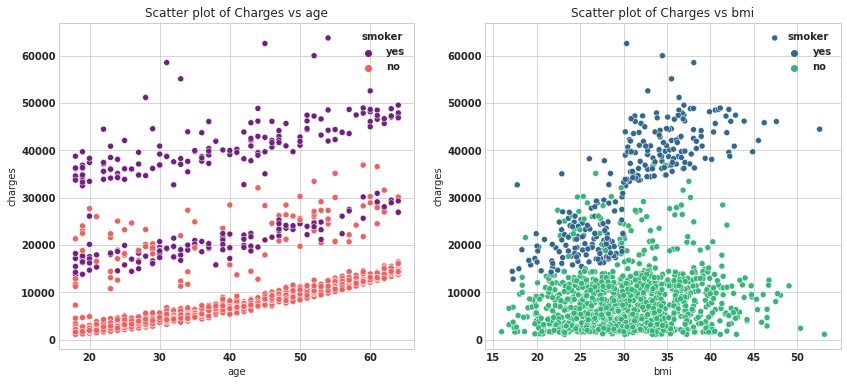

In [10]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age',y='charges',data=df,palette='magma',hue='smoker',ax=ax)
ax.set_title('Scatter plot of Charges vs age')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='charges',data=df,palette='viridis',hue='smoker')
ax.set_title('Scatter plot of Charges vs bmi')
plt.savefig('sc.png');

In [11]:
"""
From left plot the minimum age person is insured is 18 year. There is slabs in policy most of non smoker take  1st
  and  2nd
  slab, for smoker policy start at  2nd
  and  3rd
  slab.

Body mass index (BMI) is a measure of body fat based on height and weight that applies to adult men and women. The minimum bmi is 16 kg/m2
  and maximum upto 54 kg/m2
"""

'\nFrom left plot the minimum age person is insured is 18 year. There is slabs in policy most of non smoker take  1st\n  and  2nd\n  slab, for smoker policy start at  2nd\n  and  3rd\n  slab.\n\nBody mass index (BMI) is a measure of body fat based on height and weight that applies to adult men and women. The minimum bmi is 16 kg/m2\n  and maximum upto 54 kg/m2\n'

<h2 id="Data-Preprocessing" style="box-sizing: border-box; text-rendering: auto; -webkit-font-smoothing: antialiased; font-family: Inter, sans-serif; font-weight: 500; line-height: 1.4; color: #202214; margin: 0px 0px 8px; font-size: 20px;" tabindex="0">Data Preprocessing<a class="anchor-link" style="box-sizing: border-box; text-rendering: auto; -webkit-font-smoothing: antialiased; color: #008abc; padding: 0px 20px; visibility: visible;" href="https://www.kaggleusercontent.com/kf/31415973/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..jDUXW6h1KkJ8502AA-gjSQ.n4VRUCsB0d5UirUwnwx6mV4pN-3TFwp2TjoRVlO_0oD47D-5jubc5G5_WZUPOUjzxvzIquge5YdJB5Vd-r1Y1ezpKHLukuiavH2dIJhg0we4CPRV5MNtYvEV_5jqQWF7fZ5hq8bF9duxWt4g-TP2-8dfinfTjgX7buMT1bvqibsJI5vMgK-izj17W1K7APgqIRv_RxTytbKFx4UoHaVS-1iaWpcx_bKa-udBcZtVy3oGU48e0mF7TnfCXi2jdHmJJcAB766_CPSe1ARsJ_tY049VF4g4RJ1M0xq4ef4xLBO4U9HDAP-DkycHt6N-UznEvDix89Mx5lWtBjV9mOztG2I9uMps5Ufa_e91cioVdLjlENozlfLyjPSAYlp5vLQJZDzru7gb7TO75Hu1rUJuK0YgqBRqvPybv96B43cwUccHwUKEC0H6sT-VqxAGrASRoL8o8yqLTTwRq5Cc_Gs4ABrfcBbAIKsKMV1TwS6k2m5Ezj87eUXelwCJYa1iWlB7TNjgxOJ5XKh8wuy0suHWG7G81SRBmxuVWqtkjCyshwribXefn2PELzmLxmBlL5mz0oc4-aLpSKAYEbb5HFEIMSdWBjjVsJinUJ0HfN8Cc-TZLog0L-T6hmJ-WUyGPU404al42r_07LyHUoXinDw0Eg.OE-Xw-OVFtAbIhMnBAwGYA/__resultx__.html?sharingControls=true#Data-Preprocessing" target="_self" rel=" noreferrer nofollow">&para;</a></h2>
<h3 id="Encoding" style="box-sizing: border-box; text-rendering: auto; -webkit-font-smoothing: antialiased; font-family: Inter, sans-serif; font-weight: 500; line-height: 1.4; color: #202214; margin: 32px 0px 8px; font-size: 16px;" tabindex="0">Encoding</h3>
<p style="box-sizing: border-box; text-rendering: auto; -webkit-font-smoothing: antialiased; margin: 0px 0px 16px; color: #3c4043; font-family: Inter, sans-serif; font-size: 14px; line-height: 1.7;">Machine learning algorithms cannot work with categorical data directly, categorical data must be converted to number.</p>
<ol style="box-sizing: border-box; text-rendering: auto; -webkit-font-smoothing: antialiased; margin-top: 16px; margin-bottom: 16px; list-style-position: initial; list-style-image: initial; padding-left: 2em; color: #3c4043; font-family: Inter, sans-serif; font-size: 14px;">
<li style="box-sizing: border-box; text-rendering: auto; -webkit-font-smoothing: antialiased; margin-bottom: 4px;">Label Encoding</li>
<li style="box-sizing: border-box; text-rendering: auto; -webkit-font-smoothing: antialiased; margin-bottom: 4px;">One hot encoding</li>
<li style="box-sizing: border-box; text-rendering: auto; -webkit-font-smoothing: antialiased; margin-bottom: 4px;">Dummy variable trap</li>
</ol>
<p style="box-sizing: border-box; text-rendering: auto; -webkit-font-smoothing: antialiased; margin: 0px 0px 16px; color: #3c4043; font-family: Inter, sans-serif; font-size: 14px; line-height: 1.7;"><strong style="box-sizing: border-box; text-rendering: auto; -webkit-font-smoothing: antialiased;">Label encoding</strong>&nbsp;refers to transforming the word labels into numerical form so that the algorithms can understand how to operate on them.</p>
<p style="box-sizing: border-box; text-rendering: auto; -webkit-font-smoothing: antialiased; margin: 0px 0px 16px; color: #3c4043; font-family: Inter, sans-serif; font-size: 14px; line-height: 1.7;">A&nbsp;<strong style="box-sizing: border-box; text-rendering: auto; -webkit-font-smoothing: antialiased;">One hot encoding</strong>&nbsp;is a representation of categorical variable as binary vectors.It allows the representation of categorical data to be more expresive. This first requires that the categorical values be mapped to integer values, that is label encoding. Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.</p>
<p style="box-sizing: border-box; text-rendering: auto; -webkit-font-smoothing: antialiased; margin: 0px 0px 16px; color: #3c4043; font-family: Inter, sans-serif; font-size: 14px; line-height: 1.7;">The&nbsp;<strong style="box-sizing: border-box; text-rendering: auto; -webkit-font-smoothing: antialiased;">Dummy variable trap</strong>&nbsp;is a scenario in which the independent variable are multicollinear, a scenario in which two or more variables are highly correlated in simple term one variable can be predicted from the others.</p>

In [12]:
# Dummy variable
categorical_columns = ['sex','children', 'smoker', 'region']
df_encode = pd.get_dummies(data = df, prefix = 'OHE', prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')

In [13]:
# Lets verify the dummay variable process
print('Columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in the dataset:',df.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)

Columns in original data frame:
 ['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'charges']

Number of rows and columns in the dataset: (1338, 7)

Columns in data frame after encoding dummy variable:
 ['age' 'bmi' 'charges' 'OHE_male' 'OHE_1' 'OHE_2' 'OHE_3' 'OHE_4' 'OHE_5'
 'OHE_yes' 'OHE_northwest' 'OHE_southeast' 'OHE_southwest']

Number of rows and columns in the dataset: (1338, 13)


<h2>Box -Cox transformation - Transform non-normal dependent variable into a normal shape</h2>
<p>A Box Cox transformation is a way to transform non-normal dependent variables into a normal shape. Normality is an important assumption for many statistical techniques; if your data isn&rsquo;t normal, applying a Box-Cox means that you are able to run a broader number of tests. All that we need to perform this transformation is to find lambda value and apply the rule shown below to your variable.</p>
<p>&nbsp;</p>
<p>{y&lambda;&minus;1&lambda;,log(yi)yi&not;=0&lambda;=0</p>
<p>&nbsp;</p>
<p>The trick of Box-Cox transformation is to find lambda value, however in practice this is quite affordable. The following function returns the transformed variable, lambda value,confidence interval</p>

In [14]:
from scipy.stats import boxcox
y_bc,lam, ci= boxcox(df_encode['charges'],alpha=0.05)

#df['charges'] = y_bc  
# it did not perform better for this model, so log transform is used
ci,lam

((-0.011402906172912449, 0.09880968597675217), 0.04364908652296504)

In [20]:
lam

0.04364908652296504

In [17]:
## Log transform
df_encode['charges'] = np.log(df_encode['charges'])

#The original categorical variable are remove and also one of the one hot encode varible column for perticular categorical variable 
#is dropped from the column. So we completed all three encoding step by using get dummies function.



In [18]:
df_encode['charges']

0       0.822263
1       0.697466
2       0.755322
3       0.833950
4       0.747374
          ...   
1333    0.800493
1334    0.713480
1335    0.693632
1336    0.707439
1337    0.845951
Name: charges, Length: 1338, dtype: float64

In [21]:
### Train Test split¶ ###

from sklearn.model_selection import train_test_split
X = df_encode.drop('charges',axis=1) # Independet variable
y = df_encode['charges'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [22]:
### Model building¶

# Step 1: add x0 =1 to dataset
X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]

# Step2: build model
theta = np.matmul(np.linalg.inv( np.matmul(X_train_0.T,X_train_0) ), np.matmul(X_train_0.T,y_train)) 

In [23]:
# The parameters for linear regression model
parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})

In [24]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.

#Parameter
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df

,Parameter,Columns,theta,Sklearn_theta
0,theta_0,intersect:x_0=1,0.684401,0.684401
1,theta_1,age,0.001789,0.001789
2,theta_2,bmi,0.000587,0.000587
3,theta_3,OHE_male,-0.004144,-0.004144
4,theta_4,OHE_1,0.009271,0.009271
5,theta_5,OHE_2,0.015750,0.015750
6,theta_6,OHE_3,0.014201,0.014201
7,theta_7,OHE_4,0.028620,0.028620
8,theta_8,OHE_5,0.027193,0.027193
9,theta_9,OHE_yes,0.074490,0.074490


In [ ]:
### Model evaluation¶ ###

We will predict value for target variable by using our model parameter for test data set. Then compare the predicted value with actual valu in test set. We compute Mean Square Error using formula
J(θ)=1m∑i=1m(y^i−yi)2
 
R2
  is statistical measure of how close data are to the fitted regression line.  R2
  is always between 0 to 100%. 0% indicated that model explains none of the variability of the response data around it's mean. 100% indicated that model explains all the variablity of the response data around the mean.

R2=1−SSESST
 
SSE = Sum of Square Error
SST = Sum of Square Total
SSE=∑i=1m(y^i−yi)2
 
SST=∑i=1m(yi−y¯i)2
 
Here  y^
  is predicted value and  y¯
  is mean value of  y
 .

In [25]:
# Normal equation
y_pred_norm =  np.matmul(X_test_0,theta)

#Evaluvation: MSE
J_mse = np.sum((y_pred_norm - y_test)**2)/ X_test_0.shape[0]

# R_square 
sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)
print('R square obtain for normal equation method is :',R_square)

The Mean Square Error(MSE) or J(theta) is:  0.0005176855732983305
R square obtain for normal equation method is : 0.7700187436377834


In [28]:
# sklearn regression module
y_pred_sk = lin_reg.predict(X_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)

# R_square
R_square_sk = lin_reg.score(X_test,y_test)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)
print('R square obtain for scikit learn library is :',R_square_sk)

The Mean Square Error(MSE) or J(theta) is:  0.0005176855732983255
R square obtain for scikit learn library is : 0.7700187436377857


In [26]:
'''Model Validation¶
In order to validated model we need to check few assumption of linear regression model. The common assumption for Linear Regression model are following

Linear Relationship: In linear regression the relationship between the dependent and independent variable to be linear. This can be checked by scatter ploting Actual value Vs Predicted value
The residual error plot should be normally distributed.

The mean of residual error should be 0 or close to 0 as much as possible

The linear regression require all variables to be multivariate normal. This assumption can best checked with Q-Q plot.

Linear regession assumes that there is little or no Multicollinearity in the data. Multicollinearity occurs when the independent variables are too highly correlated with each other. The variance inflation factor VIF* identifies correlation between independent variables and strength of that correlation. VIF=11−R2
, If VIF >1 & VIF <5 moderate correlation, VIF < 5 critical level of multicollinearity.

Homoscedasticity: The data are homoscedastic meaning the residuals are equal across the regression line. We can look at residual Vs fitted value scatter plot. If heteroscedastic plot would exhibit a funnel shape pattern.'''

'Model Validation¶\nIn order to validated model we need to check few assumption of linear regression model. The common assumption for Linear Regression model are following\n\nLinear Relationship: In linear regression the relationship between the dependent and independent variable to be linear. This can be checked by scatter ploting Actual value Vs Predicted value\nThe residual error plot should be normally distributed.\n\nThe mean of residual error should be 0 or close to 0 as much as possible\n\nThe linear regression require all variables to be multivariate normal. This assumption can best checked with Q-Q plot.\n\nLinear regession assumes that there is little or no Multicollinearity in the data. Multicollinearity occurs when the independent variables are too highly correlated with each other. The variance inflation factor VIF* identifies correlation between independent variables and strength of that correlation. VIF=11−R2\n, If VIF >1 & VIF <5 moderate correlation, VIF < 5 critical l

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


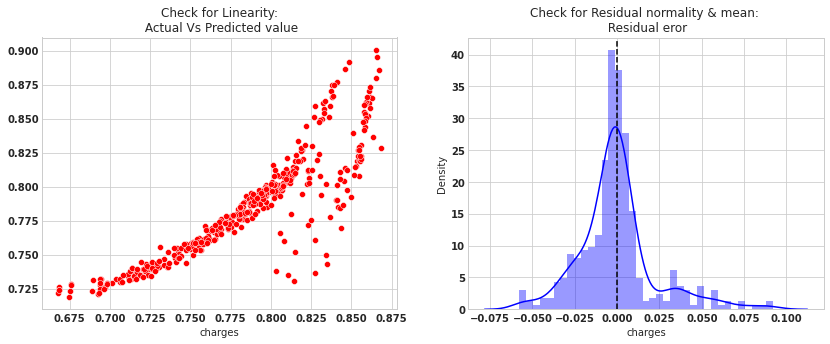

In [29]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,y_pred_sk,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_pred_sk),ax=ax,color='b')
ax.axvline((y_test - y_pred_sk).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

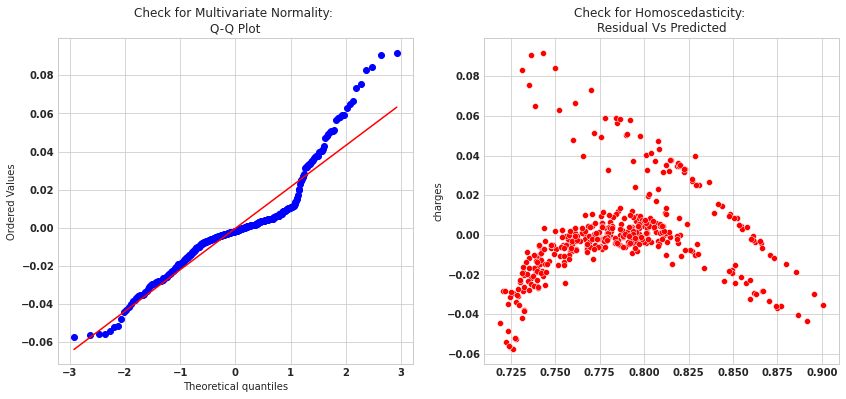

In [30]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred_sk),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred_sk), x= y_pred_sk, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

In [31]:
# Check for Multicollinearity
#Variance Inflation Factor
VIF = 1/(1- R_square_sk)
VIF

4.348180437909369

In [ ]:
The model assumption linear regression as follows

In our model the actual vs predicted plot is curve so linear assumption fails
The residual mean is zero and residual error plot right skewed
Q-Q plot shows as value log value greater than 1.5 trends to increase
The plot is exhibit heteroscedastic, error will increase after certian point.
Variance inflation factor value is less than 5, so no multicollearity.